In [1]:
!pip install -q pycausalimpact

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from causalimpact import CausalImpact

In [6]:
data = pd.read_csv('/Users/danieltom/Desktop/data/archive.csv', parse_dates= {"date" : ["Year","Month"]})

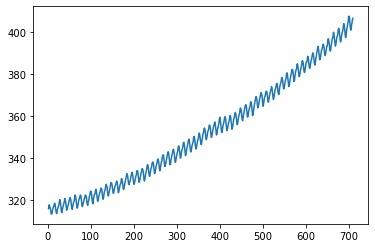

In [7]:
data = data.dropna(how='any', subset=['Carbon Dioxide (ppm)'])
data.head()
plt.plot(data['Carbon Dioxide (ppm)'])

In [8]:
data.head()
data = data.dropna(how='any', subset=['Carbon Dioxide (ppm)'])
data = data[data['date'].between('1970-01-01', '2016-12-01')]
data["raw data"]   = data["Carbon Dioxide (ppm)"]
data.loc[data.date > '2004-12-01', "Carbon Dioxide (ppm)"] = data["Carbon Dioxide (ppm)"] - 15
data['CO2_detrended'] = data['raw data'] - data['raw data'].shift(1)
data.loc[data.date > '2004-12-01', "CO2_detrended"] = data["CO2_detrended"] - 15
data = data.set_index('date')

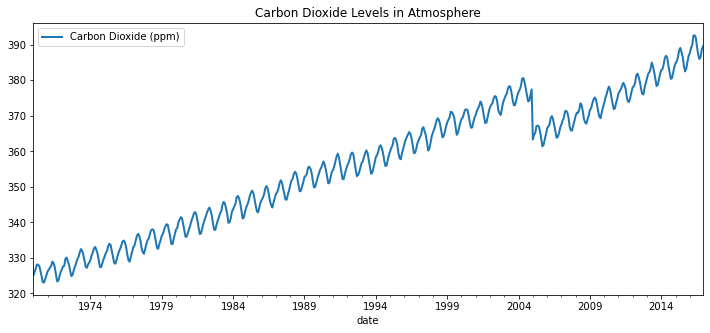

In [9]:
data.plot(y='Carbon Dioxide (ppm)', kind='line',figsize=(12,5), lw=2, title="Carbon Dioxide Levels in Atmosphere");

In [10]:
data.head()

,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),raw data,CO2_detrended
date,,,,,,,
1970-01-01,1970.0411,325.06,325.04,325.27,325.24,325.06,NaN
1970-02-01,1970.1260,325.98,325.35,325.96,325.32,325.98,0.92
1970-03-01,1970.2027,326.93,325.59,326.74,325.39,326.93,0.95
1970-04-01,1970.2877,328.14,325.73,327.90,325.47,328.14,1.21
1970-05-01,1970.3699,328.08,325.18,328.45,325.55,328.08,-0.06


In [19]:
data = data.reset_index()
data

,level_0,index,date,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),raw data,CO2_detrended
0,0,0,1970-01-01,1970.0411,325.06,325.04,325.27,325.24,325.06,NaN
1,1,1,1970-02-01,1970.1260,325.98,325.35,325.96,325.32,325.98,0.92
2,2,2,1970-03-01,1970.2027,326.93,325.59,326.74,325.39,326.93,0.95
3,3,3,1970-04-01,1970.2877,328.14,325.73,327.90,325.47,328.14,1.21
4,4,4,1970-05-01,1970.3699,328.08,325.18,328.45,325.55,328.08,-0.06
...,...,...,...,...,...,...,...,...,...,...
559,559,559,2016-08-01,2016.6230,387.24,403.78,403.02,404.60,402.24,-17.26
560,560,560,2016-09-01,2016.7077,386.01,404.52,401.33,404.85,401.01,-16.23
561,561,561,2016-10-01,2016.7896,386.50,405.12,401.48,405.09,401.50,-14.51
562,562,562,2016-11-01,2016.8743,388.64,405.92,403.08,405.34,403.64,-12.86


In [68]:
data[data['Decimal Date']>2004.9563]

,level_0,index,date,Decimal Date,Carbon Dioxide (ppm),Seasonally Adjusted CO2 (ppm),Carbon Dioxide Fit (ppm),Seasonally Adjusted CO2 Fit (ppm),raw data,CO2_detrended
420,420,420,2005-01-01,2005.0411,363.34,378.31,378.48,378.44,378.34,-14.10
421,421,421,2005-02-01,2005.1260,364.61,378.90,379.38,378.66,379.61,-13.73
422,422,422,2005-03-01,2005.2027,365.17,378.67,380.38,378.85,380.17,-14.44
423,423,423,2005-04-01,2005.2877,367.05,379.33,381.81,379.07,382.05,-13.12
424,424,424,2005-05-01,2005.3699,367.24,378.96,382.56,379.29,382.24,-14.81
...,...,...,...,...,...,...,...,...,...,...
559,559,559,2016-08-01,2016.6230,387.24,403.78,403.02,404.60,402.24,-17.26
560,560,560,2016-09-01,2016.7077,386.01,404.52,401.33,404.85,401.01,-16.23
561,561,561,2016-10-01,2016.7896,386.50,405.12,401.48,405.09,401.50,-14.51
562,562,562,2016-11-01,2016.8743,388.64,405.92,403.08,405.34,403.64,-12.86


Text(0.5, 1.0, 'C02 over time')

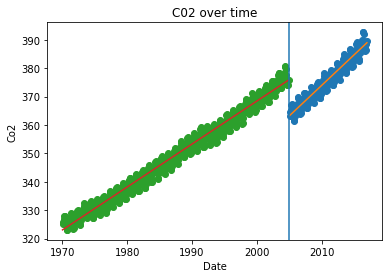

In [67]:
a = data[data['date'] > '2004-12-01']
aa = np.mean(a['Carbon Dioxide (ppm)'])
b = data[data['date'] < '2004-12-01']
bb = np.mean(b['Carbon Dioxide (ppm)'])
x1 = a['Decimal Date']
x2 = b['Decimal Date']
x1 = x1.to_numpy()
x2 = x2.to_numpy()
y1 = a['Carbon Dioxide (ppm)']
y2 = b['Carbon Dioxide (ppm)']
y1 = y1.to_numpy()
y2 = y2.to_numpy()
m1, b1 = np.polyfit(x1, y1, 1)
plt.plot(x1, y1, 'o')
plt.plot(x1, m1*x1 + b1)
m2, b2 = np.polyfit(x2, y2, 1)
plt.plot(x2, y2, 'o')
plt.plot(x2, m2*x2 + b2)
plt.axvline(x=2004.9563)
plt.xlabel('Date')
plt.ylabel('Co2')
plt.title("C02 over time")

In [39]:
a = data[data['date'] > '2004-12-01']
aa = np.mean(a['Carbon Dioxide (ppm)'])
b = data[data['date'] < '2004-12-01']
bb = np.mean(b['Carbon Dioxide (ppm)'])


x1 = a['date']
x2 = b['date']
x1 = x1.to_numpy()
x2 = x2.to_numpy()
y1 = a['Carbon Dioxide (ppm)']
y2 = b['Carbon Dioxide (ppm)']
y1 = y1.to_numpy()
y2 = y2.to_numpy()


In [94]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
from sklearn.linear_model import LinearRegression # to build a LR model for comparison
import matplotlib
import matplotlib.pyplot as plt
import statsmodels as sm # to build a LOWESS model
from scipy.interpolate import interp1d # for interpolation of new data points
import plotly.graph_objects as go
import plotly.express as px 
from rdd import rdd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [112]:
a = data[data['date'] > '2004-12-01']
aa = np.mean(a['Carbon Dioxide (ppm)'])
b = data[data['date'] < '2004-12-01']
bb = np.mean(b['Carbon Dioxide (ppm)'])
x1 = a['Decimal Date']
x2 = b['Decimal Date']
x1 = x1.to_numpy()
x2 = x2.to_numpy()
y1 = a['Carbon Dioxide (ppm)']
y2 = b['Carbon Dioxide (ppm)']
y1 = y1.to_numpy()
y2 = y2.to_numpy()
m1, b1 = np.polyfit(x1, y1, 1)
#plt.plot(x1, y1, 'o')
#plt.plot(x1, m1*x1 + b1)
m2, b2 = np.polyfit(x2, y2, 1)
#plt.plot(x2, y2, 'o')
#plt.plot(x2, m2*x2 + b2)
#plt.axvline(x=2004.9563)
#plt.xlabel('Date')
#plt.ylabel('Co2')
#plt.title("C02 over time")

x=data['Decimal Date'].values 
y=data['Carbon Dioxide (ppm)'].values
y_hat1 = sm.nonparametric.smoothers_lowess.lowess(y, x)
y_hat2 = sm.nonparametric.smoothers_lowess.lowess(y, x, frac=1/20)
fig = px.scatter(data, x=data['Decimal Date'], y=data['Carbon Dioxide (ppm)'], 
                 opacity=0.8, color_discrete_sequence=['black'])
fig.add_traces(go.Scatter(x=y_hat2[:,0], y=y_hat2[:,1], name='LOWESS, frac=1/20', line=dict(color='orange')))
fig.add_vline(x=2004.9563, line_width=3, line_dash="dash", line_color="green")




<AxesSubplot:>

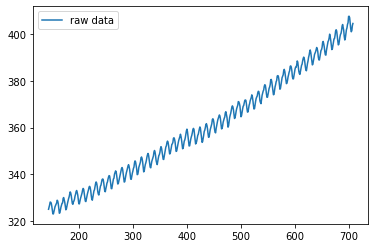

In [45]:
pre_period  = [pd.Timestamp('1970-01-01') , pd.Timestamp('2004-12-01') ]
post_period = [ pd.Timestamp('2005-01-01') , pd.Timestamp('2016-12-01') ]

In [49]:
ci = CausalImpact(data.loc[:,"CO2_detrended"], 
                  pre_period, post_period, 
                  nseasons=[{'period': 12}],
                  prior_level_sd=0.05)

/Users/davidlu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/davidlu/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/optimizer.py:23: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: prior_level_sd, standardize, nseasons. After release 0.14, this will raise.
  FutureWarning


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    -14.81             -2132.89
Prediction (s.d.)         0.17 (0.38)        24.75 (54.1)
95% CI                    [-0.6, 0.88]       [-85.84, 126.22]

Absolute effect (s.d.)    -14.98 (0.38)      -2157.64 (54.1)
95% CI                    [-15.69, -14.22]   [-2259.11, -2047.05]

Relative effect (s.d.)    -8718.25% (218.59%)-8718.25% (218.59%)
95% CI                    [-9128.28%, -8271.42%][-9128.28%, -8271.42%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


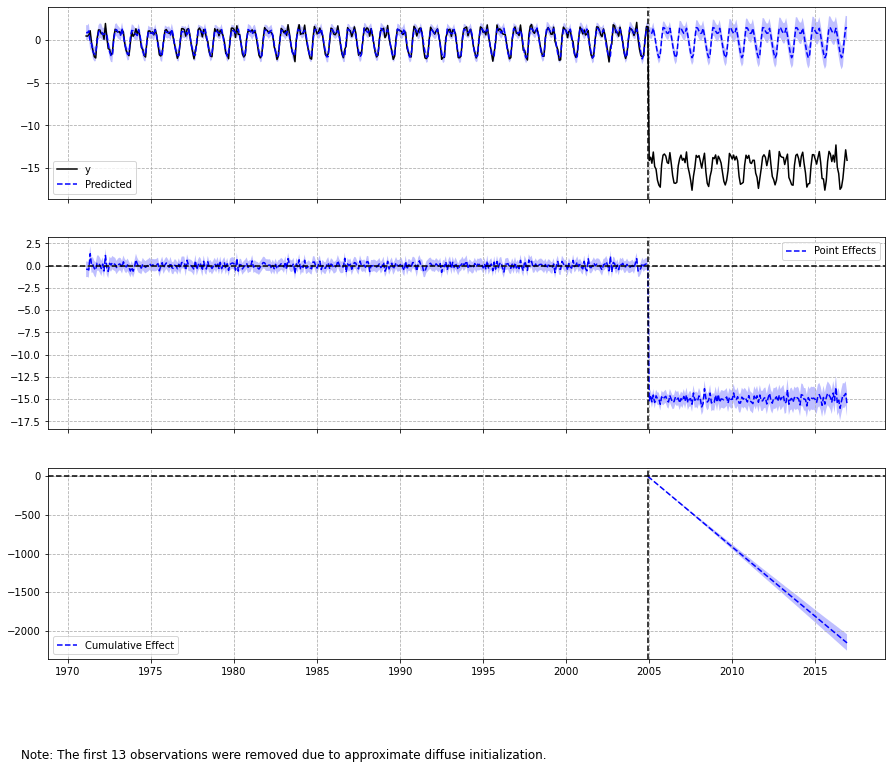

In [52]:
print(ci.summary())
ci.plot()